We apply different clustering methods to bullet screen text data of series of four animes.

In [4]:
import pandas as pd
import wordcloud
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud, STOPWORDS
from sklearn.cluster import KMeans
import os
import jieba
stop = [line.strip() for line in open('scu_stopwords.txt',encoding='utf-8').readlines() ]

names=['black_heart','fate_ubw','violet','dragon_maid']
indlist=[range(1,13),range(13,26), range(1,14),range(1,14)]

s_list=[]
for name_ind in range(4):
    name=names[name_ind]
    for i in indlist[name_ind]:
        tempString = ""
        File=open('''bilibili bullet screens_cleaned\{}\{}_p{}_cleaned.txt'''.format(name,name,i),'r',encoding='utf-8')
        for line in File.readlines():
            wordlist=jieba.cut(line)
            for word in wordlist:
                if word not in stop:
                    tempString = tempString + word + " "
        s_list.append(tempString)

MyCV=CountVectorizer(input='content')

My_DTM = MyCV.fit_transform(s_list)
MyColumnNames = MyCV.get_feature_names()

df_short=pd.DataFrame(My_DTM.toarray(),columns=MyColumnNames)
print(df_short.shape)

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\cml\AppData\Local\Temp\jieba.cache
Loading model cost 0.595 seconds.
Prefix dict has been built successfully.


(51, 34188)


In [5]:
f_sum=df_short.apply(sum,axis=1)
for i in range(0,48):
    df_short.iloc[i,:]=df_short.iloc[i,:]/f_sum[i]
print(df_short.iloc[0:6,])

         00  000       001       007   01        02  0216  0221  045556   06  \
0  0.000000  0.0  0.000191  0.001147  0.0  0.000000   0.0   0.0     0.0  0.0   
1  0.000000  0.0  0.000000  0.000147  0.0  0.000000   0.0   0.0     0.0  0.0   
2  0.000000  0.0  0.000000  0.000282  0.0  0.000141   0.0   0.0     0.0  0.0   
3  0.000000  0.0  0.000000  0.000000  0.0  0.000000   0.0   0.0     0.0  0.0   
4  0.000164  0.0  0.000164  0.000655  0.0  0.002457   0.0   0.0     0.0  0.0   
5  0.000000  0.0  0.000000  0.000294  0.0  0.000000   0.0   0.0     0.0  0.0   

   ...       龙骑士   龙鱼        龙龙       龙龙会       龙龙开       龙龙当  龙龙快  龟太快   龟派  \
0  ...  0.000000  0.0  0.000382  0.000000  0.000000  0.000000  0.0  0.0  0.0   
1  ...  0.000147  0.0  0.000295  0.000000  0.000147  0.000000  0.0  0.0  0.0   
2  ...  0.000000  0.0  0.000282  0.000000  0.000000  0.000000  0.0  0.0  0.0   
3  ...  0.000000  0.0  0.000147  0.000147  0.000000  0.000147  0.0  0.0  0.0   
4  ...  0.000000  0.0  0.000655  0.0000

In [117]:
index=0
words=MyColumnNames
for name_ind in range(4):
    name=names[name_ind]
    for i in indlist[name_ind]:
        w=wordcloud.WordCloud(font_path ='C:\\windows\\Fonts\\simhei.ttf',background_color="white")
        freq=df_short.iloc[index,]
        dic=dict(zip(words,freq))
        w.generate_from_frequencies(dic)
        w.to_file('''bullet_pic\{}\{}_p{}.png'''.format(name,name,i))
        index=index+1

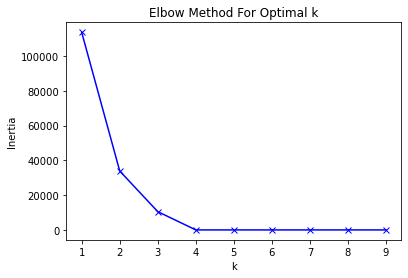

In [9]:
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
list_inertia=[]
K=range(1,10)
for k in K:
    model_kmeans=KMeans(n_clusters=k,init='k-means++')
    model_kmeans.fit(df_short)
    list_inertia.append(model_kmeans.inertia_)
    
plt.plot(K, list_inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

In [13]:
model=KMeans(n_clusters=9,init='k-means++')
model.fit(df_short)
label=model.labels_
print(label)

[6 6 6 6 6 6 6 6 6 6 6 7 8 8 8 8 8 8 8 8 8 8 8 8 4 5 5 5 5 6 5 5 5 5 5 5 5
 4 0 0 0 0 0 0 0 0 0 0 3 2 1]


In [16]:
from sklearn.cluster import AgglomerativeClustering
model=AgglomerativeClustering(n_clusters=9,affinity='euclidean')
model.fit(df_short)
label=model.labels_
print(label)

[3 3 3 3 3 3 3 3 3 3 3 5 2 2 2 2 2 2 2 2 2 2 2 2 1 0 0 0 0 0 0 0 0 0 0 0 0
 1 8 8 8 8 8 8 8 8 8 8 7 6 4]


In [17]:
model=AgglomerativeClustering(n_clusters=8,affinity='manhattan',linkage='complete')
model.fit(df_short)
label=model.labels_
print(label)

[1 1 1 1 1 1 1 1 1 1 1 3 6 6 6 6 6 6 6 6 6 6 6 6 3 2 2 2 2 2 2 2 2 2 2 2 2
 3 0 0 0 0 0 0 0 0 0 0 7 5 4]


In [142]:
model=AgglomerativeClustering(n_clusters=5,affinity='cosine',linkage='complete')
model.fit(df_short)
label=model.labels_
print(label)

[2 2 2 2 2 2 2 2 2 2 2 3 1 1 1 1 1 1 1 1 1 1 1 1 3 0 0 0 0 0 0 0 0 0 0 0 0
 3 4 4 4 4 4 4 4 4 4 4 4 4 3]


In [112]:
from sklearn.cluster import DBSCAN
model=DBSCAN(eps=0.05)
model.fit(df_short)
label=model.labels_
print(label)

[ 0  0  0 -1 -1  0 -1  0  0  0  0 -1  1  1  1  1  1  1  1  1  1  1  1  1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  2  2  2  2 -1  2 -1  2 -1 -1
 -1 -1 -1]
